In [302]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os,glob
import moviepy as mpy
import csv
from PIL import Image
import time
from scipy import ndimage
import scipy
import math
import random
from tqdm import tqdm
import pickle
# TODO: Build a model we will use Keras
from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import ELU
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import moviepy.video as mpv
import moviepy.Clip as mpc

%matplotlib inline

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

In [437]:
#Importing Data
links_of_data_folders=['./data/data-1-n','./data/data-2-n','./data/data-1-o','./data/data-1-n-w','./data/data-1-r']
image_folder_name='IMG'
image_data_log = 'driving_log.csv'
set_1_data = '{}/{}'.format(links_of_data_folders[0],image_folder_name)
set_1_label= '{}/{}'.format(links_of_data_folders[0],image_data_log)
set_2_data = '{}/{}'.format(links_of_data_folders[1],image_folder_name)
set_2_label= '{}/{}'.format(links_of_data_folders[1],image_data_log)
set_3_data = '{}/{}'.format(links_of_data_folders[2],image_folder_name)
set_3_label= '{}/{}'.format(links_of_data_folders[2],image_data_log)
set_4_data = '{}/{}'.format(links_of_data_folders[3],image_folder_name)
set_4_label= '{}/{}'.format(links_of_data_folders[3],image_data_log)
set_5_data = '{}/{}'.format(links_of_data_folders[4],image_folder_name)
set_5_label= '{}/{}'.format(links_of_data_folders[4],image_data_log)
time_load=time.time()
X_data = []
print("loading started...")
for filename in glob.glob(set_1_data+'/center*.jpg'):
    im=img_to_array(load_img(filename,target_size=(120,80)))
    X_data.append(im)
print('loading done 1/5... total time = {}s'.format(time.time()-time_load))
for filename in glob.glob(set_2_data+'/center*.jpg'): 
    im=img_to_array(load_img(filename,target_size=(120,80)))
    X_data.append(im)
print('loading done 2/5... total time = {}s'.format(time.time()-time_load))
for filename in glob.glob(set_3_data+'/center*.jpg'):
    im=img_to_array(load_img(filename,target_size=(120,80)))
    X_data.append(im)
print('loading done 3/5... total time = {}s'.format(time.time()-time_load))
for filename in glob.glob(set_4_data+'/center*.jpg'):
    im=img_to_array(load_img(filename,target_size=(120,80)))
    X_data.append(im)
time_load = time.time()-time_load
print('loading done 4/5... total time = {}s'.format(time_load))
for filename in glob.glob(set_5_data+'/center*.jpg'):
    im=img_to_array(load_img(filename,target_size=(120,80)))
    X_data.append(im)
time_load = time.time()-time_load
print('loading done 5/5... total time = {}s, total images = {}'.format(time_load,len(X_data)))

loading started...
loading done 1/5... total time = 1.7868397235870361s
loading done 2/5... total time = 3.3224661350250244s
loading done 3/5... total time = 7.486191749572754s
loading done 4/5... total time = 8.610311269760132s
loading done 5/5... total time = 1486655716.4955242s, total images = 5609


In [439]:
from numpy import genfromtxt

y_data = []    
# y_data.append(genfromtxt(set_1_label, delimiter=','))
# y_data.append(genfromtxt(set_2_label, delimiter=','))
# y_data.append(genfromtxt(set_3_label, delimiter=','))
with open(set_1_label) as csvfile:    
    reader = csv.reader(csvfile)
    for row in reader:
        y_data.append(row)
with open(set_2_label) as csvfile:    
    reader = csv.reader(csvfile)
    for row in reader:
        y_data.append(row)
with open(set_3_label) as csvfile:    
    reader = csv.reader(csvfile)
    for row in reader:
        y_data.append(row)
with open(set_4_label) as csvfile:    
    reader = csv.reader(csvfile)
    for row in reader:
        y_data.append(row)
with open(set_5_label) as csvfile:    
    reader = csv.reader(csvfile)
    for row in reader:
        y_data.append(row)
print("Done! {} labels loaded".format(len(y_data)))

Done! 5609 labels loaded


### Preprocessing
**Resizing Images in array, and get only steering values for prediction**

In [440]:
#Converting into Numpy array and cropping the images
#plt.imshow(X_data[0])
dX_data=  np.array(X_data)
print(len(X_data))
print(dX_data.shape)
#Cropping out the sky area: Keeping only road
#dX_data = dX_data[:,55:160,0:320,:]
#input_shape=dX_data.shape
#print(input_shape)

5609
(5609, 3, 120, 80)


In [287]:
#Modify Shape # currently I will not mess with this because channel is on 3rd index not on 1st :/
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
for batch in datagen.flow(dX_data, batch_size=1,
                          save_to_dir='./', save_prefix='morph', save_format='jpg'):
    i += 1
    if i > 4:
        break

(-0.5, 319.5, 104.5, -0.5)

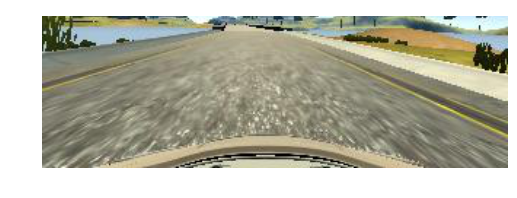

In [310]:
#Visualize Image
plt.imshow(dX_data[423])
plt.axis('off')

In [432]:
#Getting Only Steering values as we are predicting 
dy_data = np.array(y_data)
print(dy_data.shape)
#getting only steering Values
dy_data=dy_data[:,[3]]
print(dy_data.shape)

(5609, 7)
(5609, 1)


shape of input data: (5609, 105, 320, 3)
shape of output values: (5609, 1)
size of single image: (105, 320, 3)
value of single output:  -0.1153535


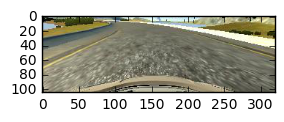

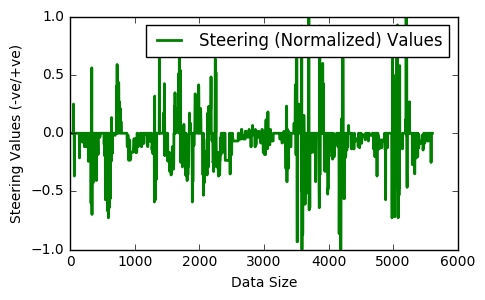

In [208]:
#Save Pickle
#X_data,y_data
Rand_Index = random.randint(0,len(y_data))
print('shape of input data: {}'.format(dX_data.shape))
print('shape of output values: {}'.format(dy_data.shape))
print('size of single image: {}'.format(dX_data[Rand_Index].shape))
print('value of single output: {}'.format(dy_data[Rand_Index][0]))
plt.figure(1,(3,3))
plt.imshow(dX_data[Rand_Index])
plt.figure(2,(5,3))
plt.xlabel("Data Size")
plt.ylabel("Steering Values (-ve/+ve)")
#plt.xticks(index_for_plot_x, list_of_traffic_labels, rotation='90',fontsize='7')
plt.plot(dy_data,label='Steering (Normalized) Values',color='g',linewidth=2.0,ls= '-')
plt.legend()
plt.show()

In [214]:
#Import Display HUD
steering_ui = plt.imread('steering_wheel.png')
#plt.imshow(steering_ui)

In [230]:
#Important Helper Functions
##CSV file contains [0] Center Image, [1] Left Image, [2] Right Image, 
##[3] Steering Angle [4] Throttle [5] Brake [6] Speed of Car
def getImageAndLogInfo(idx):
    return dX_data[idx],y_data[idx]
def getCenterImage(idx):
    return y_data[idx][0]
def getLeftImage(idx):
    return y_data[idx][1]
def getRightImage(idx):
    return y_data[idx][2]
def getSteerAngle(idx,Degree=False):
    if(Degree):
        return math.degrees(float(y_data[idx][3]))
    else:
        return float(y_data[idx][3])
def getThrottle(idx):
    return float(y_data[idx][4])
def getBrake(idx):
    return float(y_data[idx][5])
def getSpeed(idx):
    return float(y_data[idx][6])

def fullDesc(idx,FormattedText=False):
    if(FormattedText==True):
        return (getSteerAngle(idx),getThrottle(idx),getBrake(idx),getSpeed(idx))
    else:
        return "Steering: {:.3f} Throttle: {:.3f} Brake: {:.3f} Speed: {:.3f}".format(getSteerAngle(idx,True),getThrottle(idx),
                                                                                 getBrake(idx),getSpeed(idx))
def getSteerDir(val):
    if(val>0):
        return 'right'
    elif(val<0):
        return 'left'
    else:
        return 'straight'
###########Decoration Function#################
def getAngleFromRadian(val):
    return math.degrees(val)

In [338]:
#HYPER PARAMETERS
print(type(dy_data))

<class 'numpy.ndarray'>


Input Shape: (105, 320, 3)


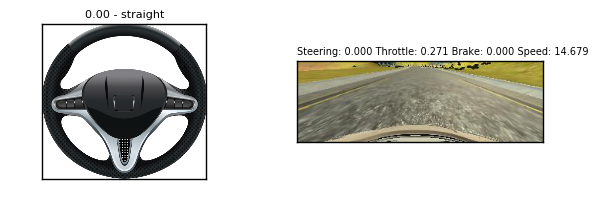

In [327]:
#Testing Single Image Data
index = random.randint(0,len(dy_data))
img,lbl=getImageAndLogInfo(index)
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(2)
f.set_figwidth(7)
csteer_val=getSteerAngle(index,True)
csteer=ndimage.rotate(steering_ui,-csteer_val)
ax1.set_title('{:.2f} - {}'.format(csteer_val,getSteerDir(csteer_val)),size=8)
ax1.imshow(csteer)
ax2.imshow(img)
ax2.set_title(fullDesc(index),loc='left',size=7)
ax1.tick_params(labelcolor='None', top='off', bottom='off', left='off', right='off')
ax2.tick_params(labelcolor='None', top='off', bottom='off', left='off', right='off')
#f.show()
input_layer_shape=img.shape#(3,)+img.shape
print('Input Shape: {}'.format(input_layer_shape))

(3, 120, 80)


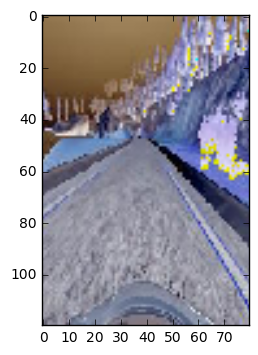

In [462]:
#Sample Data
S_Data=dX_data[1:2000][:]
S_dy=dy_data[1:2000][:]
plt.imshow(S_Data[1].transpose(1,2,0))
#print(dX_data.reshape(1, :).shape)
print(S_Data[1].shape)
#print(S_dy)

**TRAINING** 

Becareful to run next cell unless you want to train.

In [446]:
#Creating Simple Model for now
from keras import backend as K
K.set_image_dim_ordering('th')
# NVIDIA End to End Learning Pipeline Model

model = Sequential()
model.add(Convolution2D(80, 3, 3, input_shape=(3,120,80)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
#model.add(Activation('sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [463]:
# Fit the model
exception_verbosity='high'
model.fit(S_Data,S_dy, nb_epoch=5, batch_size=64, verbose=1,shuffle=True,validation_split=0.2)

Train on 1599 samples, validate on 400 samples
Epoch 1/5
1599/1599 [==============================] - 313s - loss: 1.1921e-07 - acc: 0.0056 - val_loss: 1.1921e-07 - val_acc: 0.0225
Epoch 2/5
1599/1599 [==============================] - 312s - loss: 1.1921e-07 - acc: 0.0044 - val_loss: 1.1921e-07 - val_acc: 0.0225
Epoch 3/5
1599/1599 [==============================] - 312s - loss: 1.1921e-07 - acc: 0.0063 - val_loss: 1.1921e-07 - val_acc: 0.0225
Epoch 4/5
1599/1599 [==============================] - 321s - loss: 1.1921e-07 - acc: 0.0075 - val_loss: 1.1921e-07 - val_acc: 0.0225
Epoch 5/5
1599/1599 [==============================] - 341s - loss: 1.1921e-07 - acc: 0.0075 - val_loss: 1.1921e-07 - val_acc: 0.0225


In [365]:
#Train the model
#history = model.fit(X_normalized, y_one_hot, nb_epoch=10, validation_split=0.2)
model.save('test_del')
for i in range(20):    
    testing_img=X_data[i+100].reshape(1, 3,120,80)
    print(model.predict(testing_img)[0])

[-34.28740692]
[-33.02090454]
[-32.23632812]
[-34.37626648]
[-37.72665024]
[-38.9849205]
[-40.29336548]
[-41.65488815]
[-39.74761963]
[-41.14108276]
[-39.7375946]
[-41.53434753]
[-38.07177734]
[-42.54923248]
[-40.58927155]
[-41.83267212]
[-40.88394165]
[-39.13265228]
[-39.57260513]
[-39.97676849]


In [303]:
import keras.preprocessing as kpa


References:
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html